In [1]:
import numpy as np
import math as mp
import pandas as pd

In [2]:
import numpy as np

def generate_pattern_array_with_extra_rows(tau):
    # 1) Create the original n×n pattern
    n = len(tau)+ int(np.min(tau))
    m = int(np.max(tau)) + int(np.min(tau))

    mx = int(max(tau))
    missing_count = len(set(range(int(max(tau) )+ 1)) - set(tau))
    print(missing_count)


    A = np.ones((m+2, n+missing_count), dtype=float)
    count = 0
    for i in range(1, m+2):
        for j in range(len(tau[tau == i-1])):
            A[i, n- i-j - count] = 0.95  # 0.9 shifts diagonally from right to left as we go down
        if len(tau[tau == i-1]) > 1:
            count += len(tau[tau == i-1])-1
    # 2) Create the two extra rows:
    #    (a) one row with 0.9 at the leftmost column,
    #    (b) one row of all ones.

    row_all_ones = np.ones(n+missing_count, dtype=float)
    A_extended = np.vstack([A,row_all_ones])
    A_extended = A_extended[:,0:n - int(np.min(tau))]

    return A_extended

In [3]:
# Some parameter initialization. 
sigma = 20
beta = 0.8
W = 1
n=np.linspace(10,0,11)

In [4]:
# Example usage:
A   = generate_pattern_array_with_extra_rows(n)
pd.DataFrame(A)

0


,0,1,2,3,4,5,6,7,8,9,10
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.95
2,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.95,1.00
3,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00
4,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00
5,1.00,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00
6,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00
7,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,1.00
8,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,1.00,1.00
9,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [5]:
tprod1 = beta**n* A[0,:]

In [6]:
# Solve for SS
A[0,:]
PSS = (np.sum((1/(tprod1))**(1-sigma)))
y_ss = ((1/(tprod1))/PSS)**(-1/sigma)

In [7]:
p_path = np.zeros((len(n),int(np.max(n))+1))
p_path[0,:] = (1/(tprod1))
p_path[-1:] = (1/(tprod1))
num_iterations = 10000  # Number of iterations
tolerance = 1e-8  # Convergence threshold

for i in range(1,len(n)):
    
    # Solve for transition path, testing code
    # Iteration loop
    p = np.random.rand(int(np.max(n))+1)  # Initial prices
    p_ss=1/(beta**n* A[i,:])
    p[-i:] = p_ss[-i:]
    for iteration in range(num_iterations):
        p_new = (np.sum(p**(1 - sigma))) * y_ss[:-i]**(-sigma)
        
        if np.max(np.abs(p_new - p[:-i])) < tolerance:
            print(f"Converged in {iteration + 1} iterations.")
            break
        
        p[0:-i] = 0.1*p_new + 0.9* p[0:-i]  # Update prices
    p_path[i,:] = p
    print("Final prices:", p)


Converged in 399 iterations.
Final prices: [7.7602132  6.20817056 4.96653645 3.97322916 3.17858333 2.54286666
 2.03429333 1.62743466 1.30194773 1.04155819 1.05263158]
Converged in 397 iterations.
Final prices: [9.23121392 7.38497114 5.90797691 4.72638153 3.78110522 3.02488418
 2.41990734 1.93592587 1.5487407  1.31578947 1.        ]
Converged in 638 iterations.
Final prices: [9.31203881 7.44963105 5.95970484 4.76776387 3.8142111  3.05136888
 2.4410951  1.95287608 1.64473684 1.25       1.        ]
Converged in 488 iterations.
Final prices: [9.31320865 7.45056692 5.96045354 4.76836283 3.81469026 3.05175221
 2.44140177 2.05592105 1.5625     1.25       1.        ]
Converged in 753 iterations.
Final prices: [9.31322551 7.45058041 5.96046433 4.76837146 3.81469717 3.05175773
 2.56990132 1.953125   1.5625     1.25       1.        ]
Converged in 477 iterations.
Final prices: [9.31322575 7.4505806  5.96046448 4.76837159 3.81469727 3.21237664
 2.44140625 1.953125   1.5625     1.25       1.        

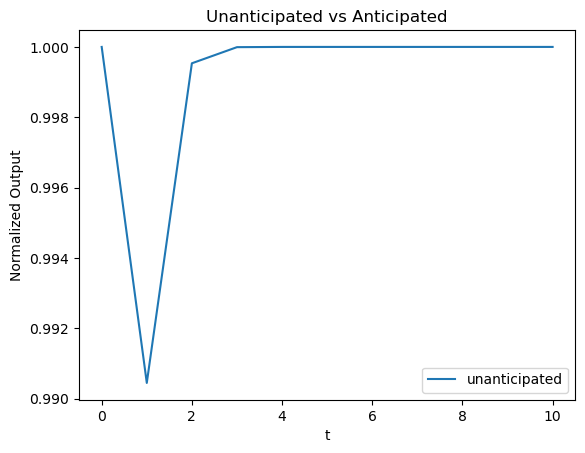

In [8]:
P0 = (np.sum(p_path**(1-sigma),axis =1))**(1/(1-sigma))

import matplotlib.pyplot as plt
plt.plot( (1/P0)*P0[0], label='unanticipated')

plt.xlabel('t')
plt.ylabel('Normalized Output')
plt.title('Unanticipated vs Anticipated')
plt.legend()
plt.show()

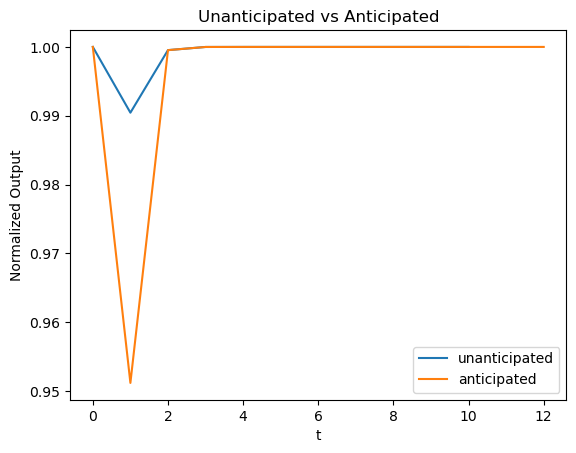

In [10]:
tproda = beta**n* A
P0 = (np.sum(p_path**(1-sigma),axis =1))**(1/(1-sigma))
Pa = (np.sum(1/(tproda)**(1-sigma),axis =1))**(1/(1-sigma))

import matplotlib.pyplot as plt
plt.plot( (1/P0)*P0[0], label='unanticipated')
plt.plot( (1/Pa)*Pa[0], label='anticipated')

plt.xlabel('t')
plt.ylabel('Normalized Output')
plt.title('Unanticipated vs Anticipated')
plt.legend()
plt.show()